# House Price Prediction Using Linear Regression

## Importing The Libraries

In [1]:

import pandas as pd
import sklearn 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
import copy
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Reading The Dataset

In [169]:
df = pd.read_csv('kc_house_data.csv')
print(df.head())



           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

## Data Cleaning

In [170]:
df = pd.read_csv('kc_house_data.csv')
df = df.drop('id', axis=1)
df = df.drop('date', axis=1)
df = df.drop('long', axis=1)
df = df.drop('lat', axis=1)
df = df.drop('zipcode', axis=1)
df = df.drop('yr_built', axis=1)
df = df.drop('yr_renovated', axis=1)


df['price']=df['price']/1000

df.head()




,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221.9,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


## Linear Regression

In [187]:
# Define features and target variable
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
         'waterfront', 'view', 'condition', 'sqft_above', 
         'sqft_basement', 'sqft_living15', 'sqft_lot15']]  # Features
y = df['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Print a comparison of actual vs predicted values for better understanding
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual and Predicted Values:")
print(comparison.head())

# Calculate accuracy based on a tolerance level
tolerance = 0.10  # 10%
accurate_predictions = np.sum(np.abs(y_pred - y_test) <= (tolerance * y_test))
accuracy_percentage = (accurate_predictions / len(y_test)) * 100

# Display accuracy
print(f"Accuracy of Predictions within {tolerance*100}% tolerance: {accuracy_percentage:.2f}%")

Mean Squared Error (MSE): 57553.30990615818
R-squared (R²): 0.6192977804122879

Comparison of Actual and Predicted Values:
       Actual    Predicted
735     365.0   585.771484
2830    865.0   773.008789
4106   1038.0  1054.232422
16218  1490.0  1468.602539
19964   711.0   557.458984
Accuracy of Predictions within 10.0% tolerance: 21.40%


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_15176\4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_15176\4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\KIIT0001\AppData\Lo

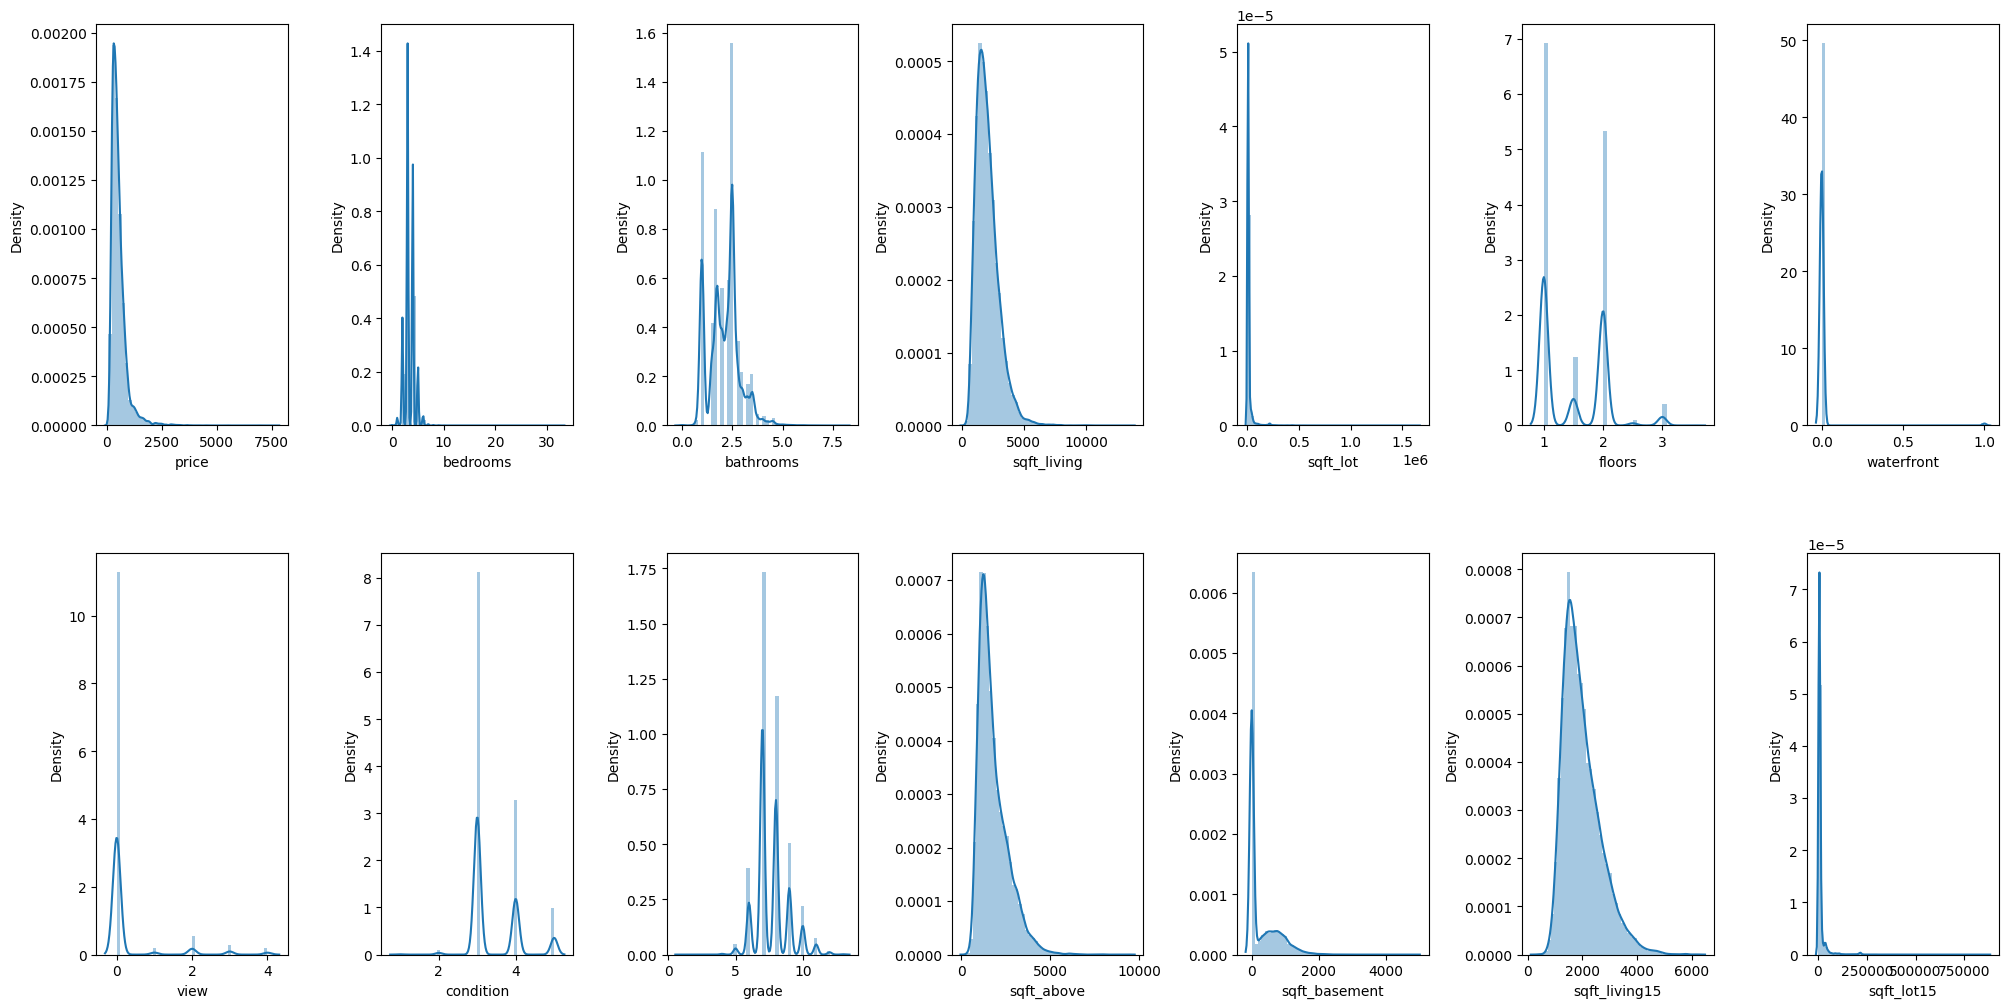

In [188]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

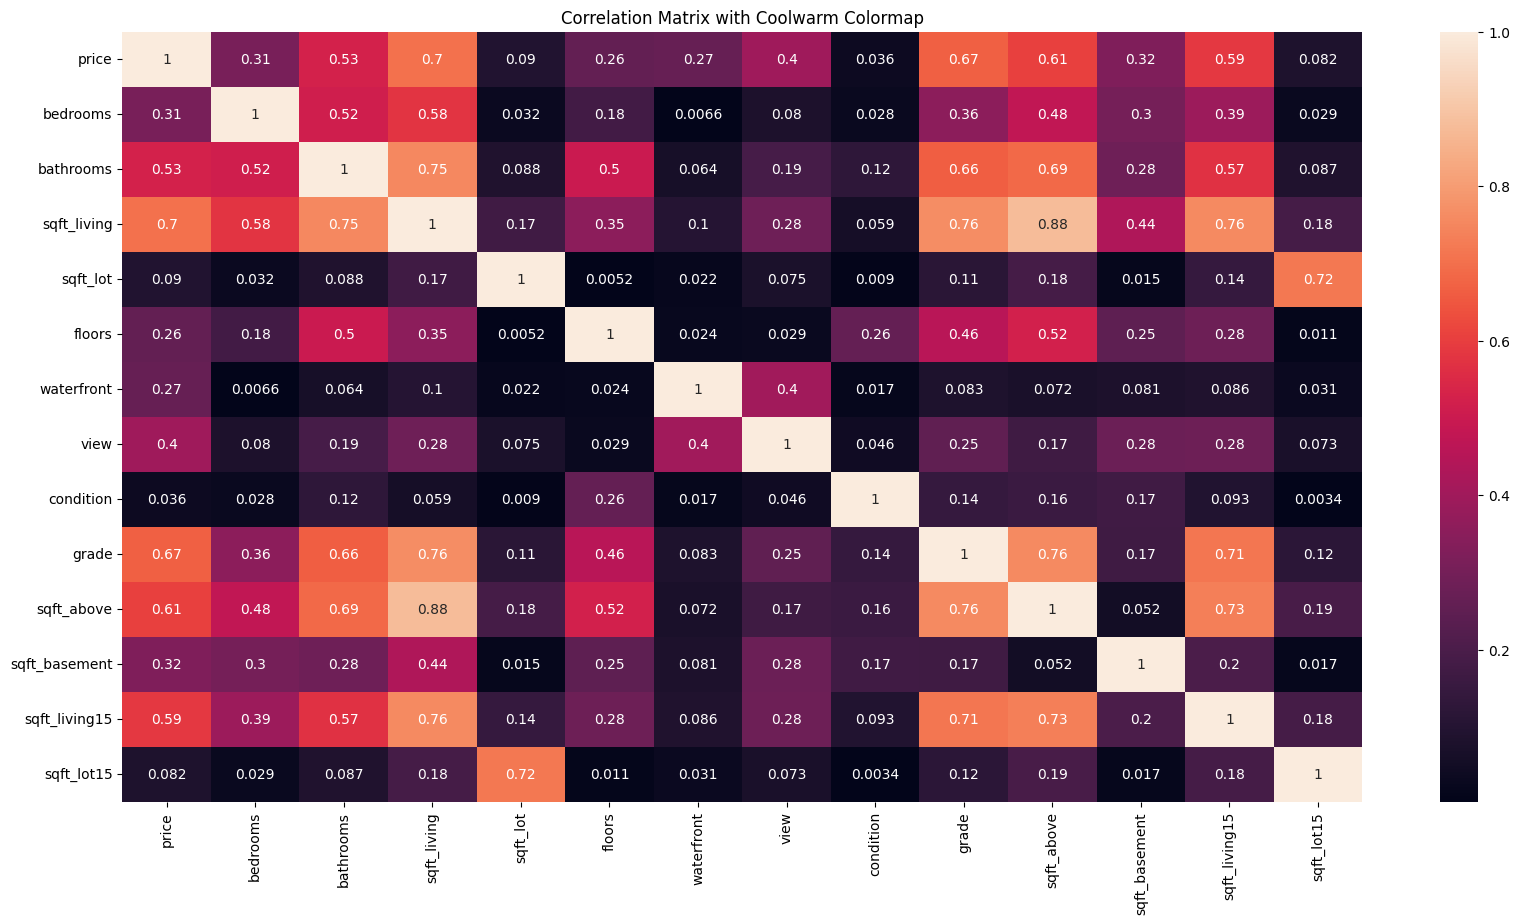

In [207]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True)  # Change 'coolwarm' to your preferred colormap
plt.title('Correlation Matrix with Coolwarm Colormap')
plt.show()


IndexError: index 8 is out of bounds for axis 0 with size 8

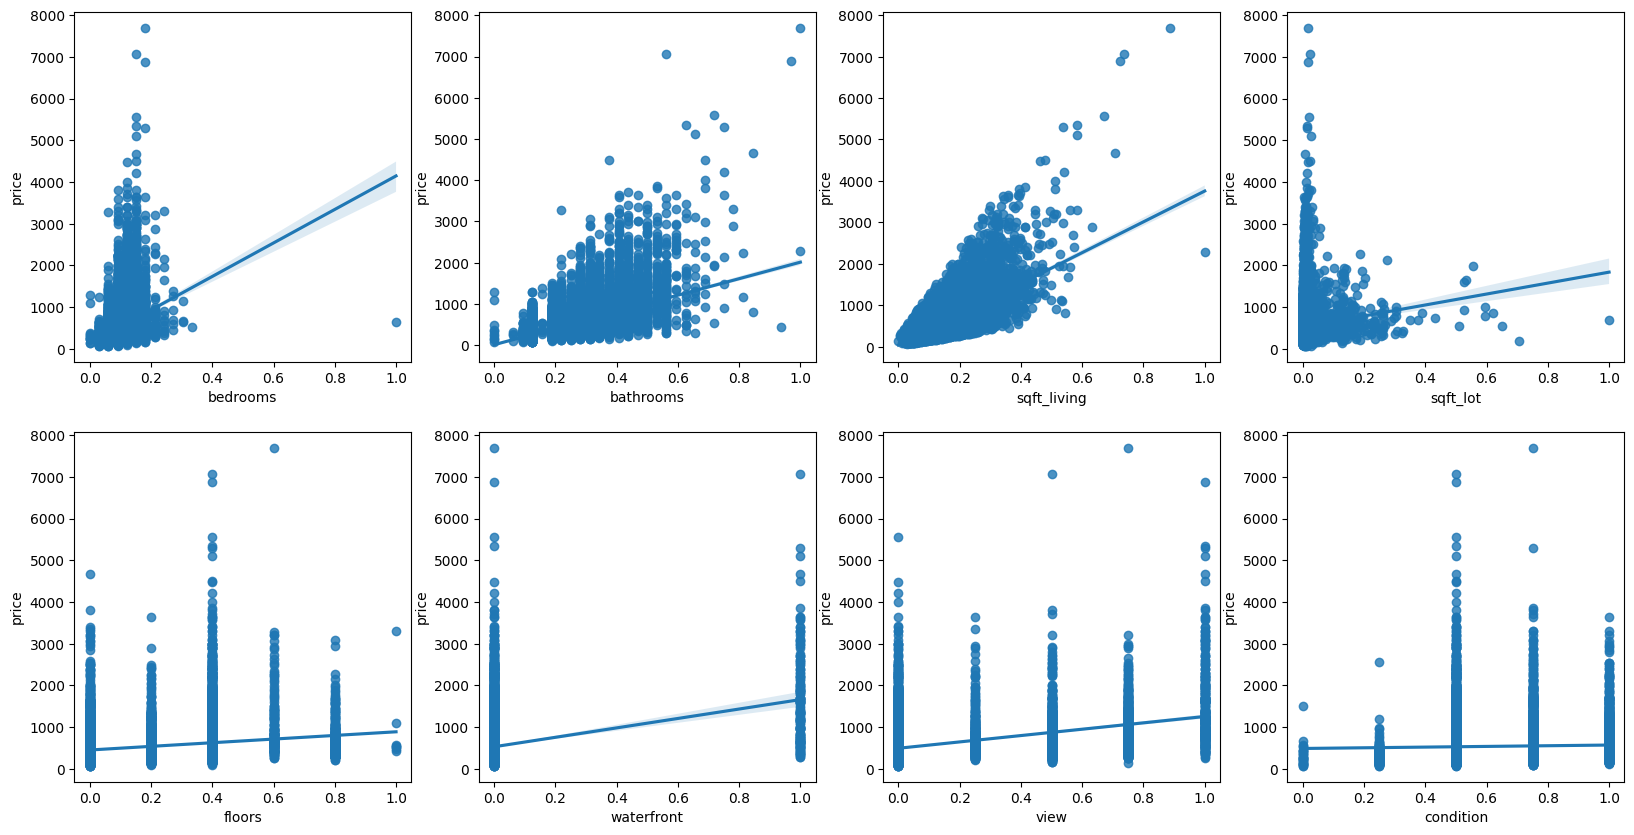

In [208]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'sqft_above',	'sqft_basement', 'sqft_living15', 'sqft_lot15']
x = df.loc[:,column_sels]
y = df['price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Figure size 1400x1200 with 0 Axes>

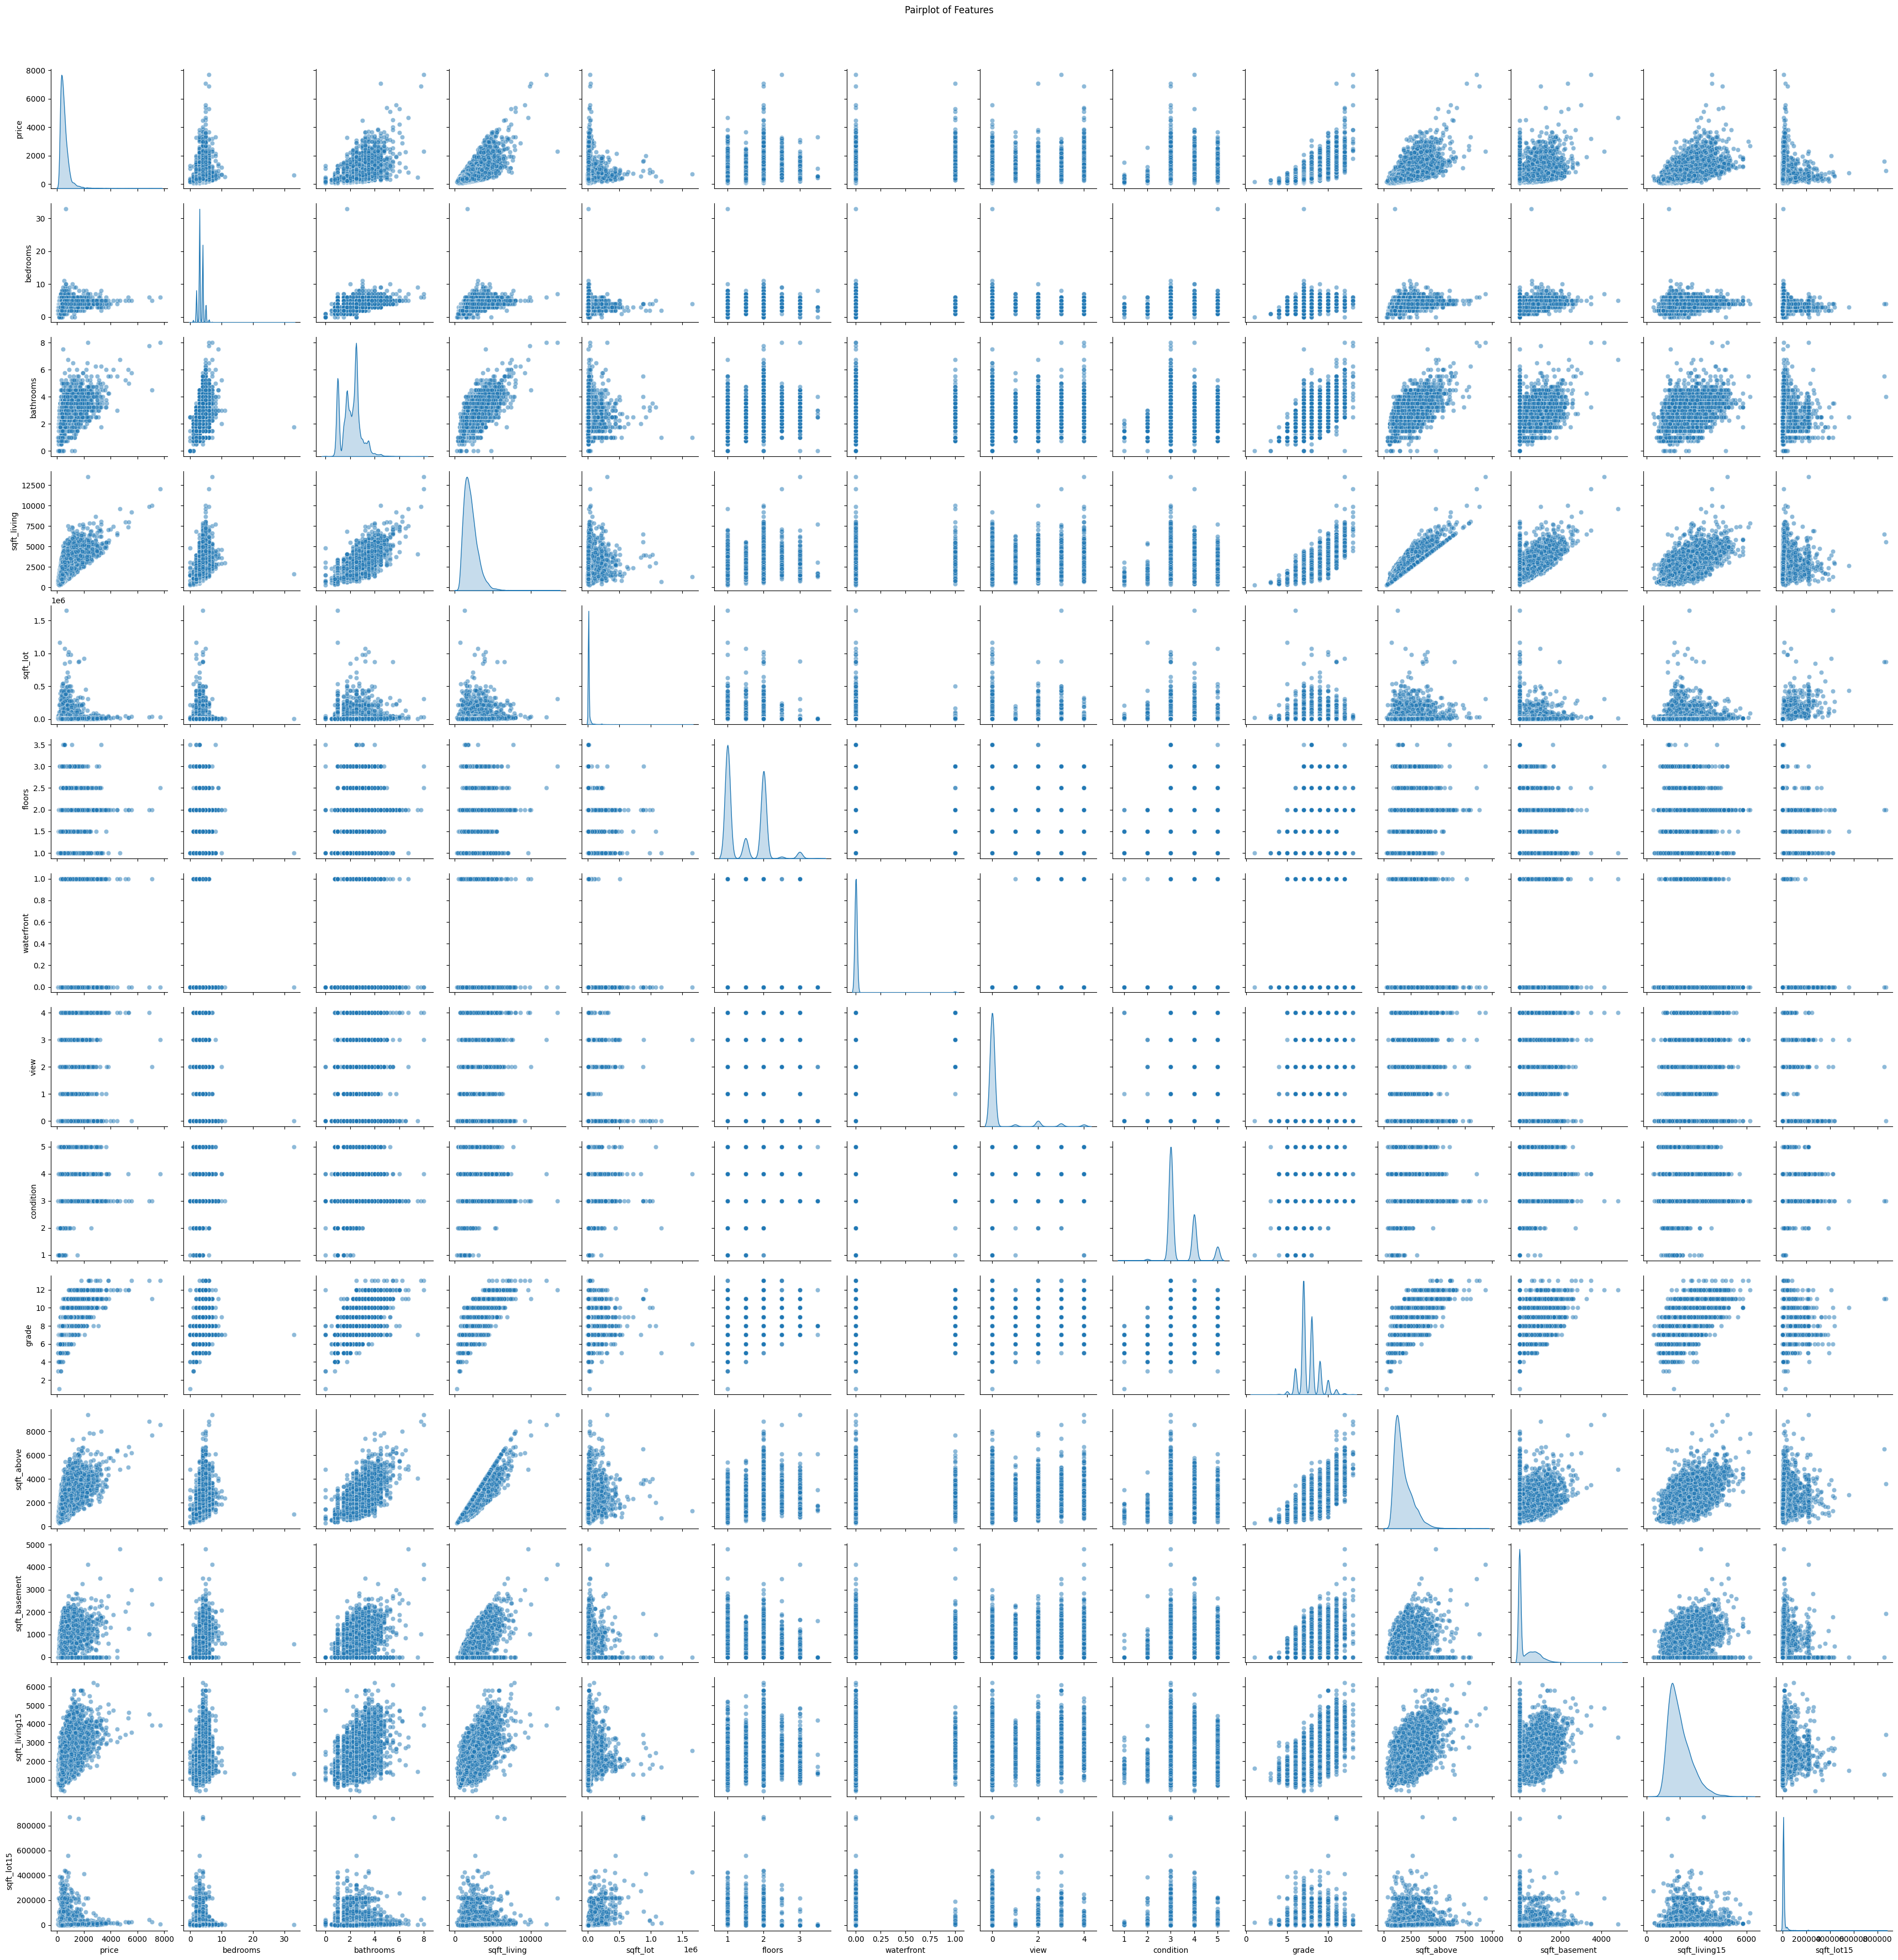

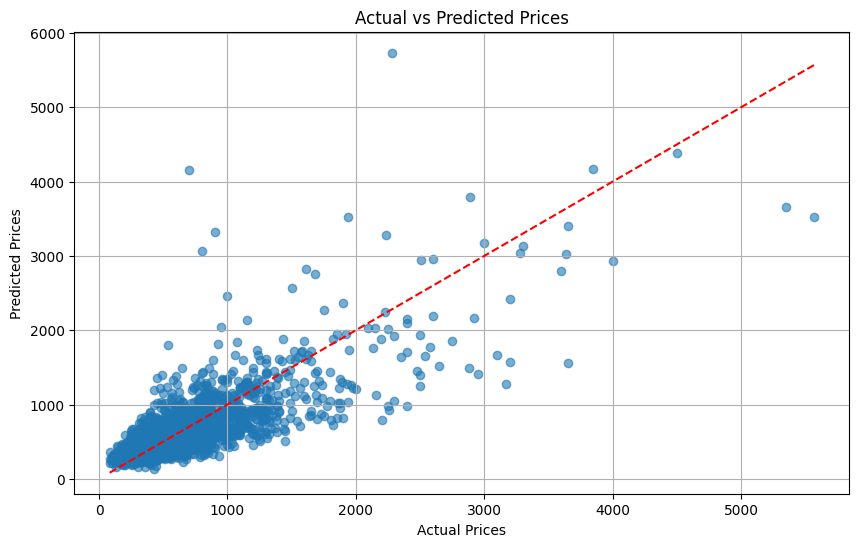

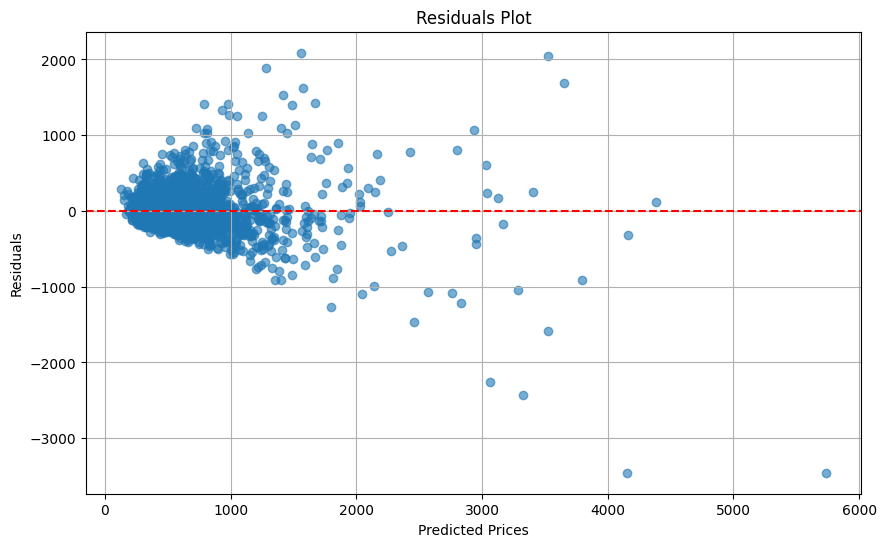

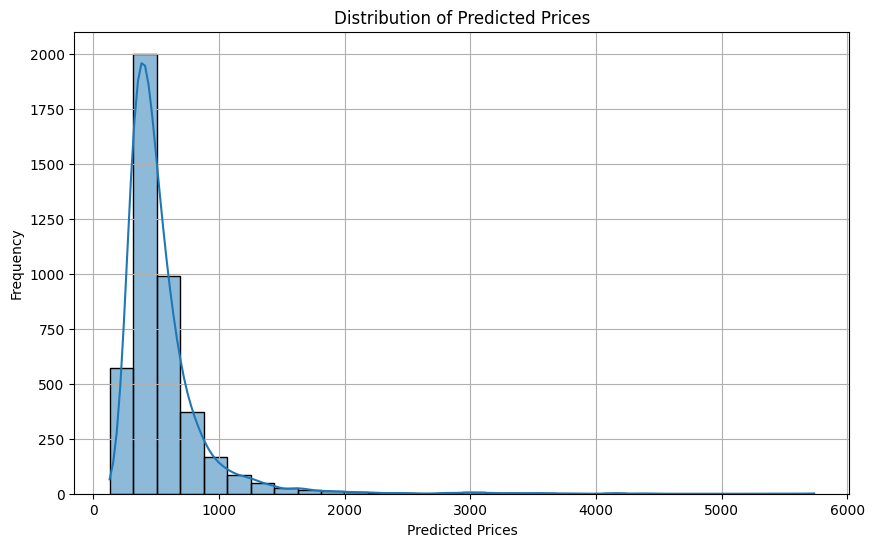

In [193]:
# 2. Pairplot with increased size
plt.figure(figsize=(14, 12))  # Set the figure size larger
sns.pairplot(df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5}, height=2.5)  # Set height for individual plots
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


# 3. Predicted vs Actual Prices Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# 4. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# 5. Distribution of Predictions
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=30, kde=True)
plt.title('Distribution of Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()